The original image must be named "image_og.png" and it must be placed in the same directory as this .ipynb file.

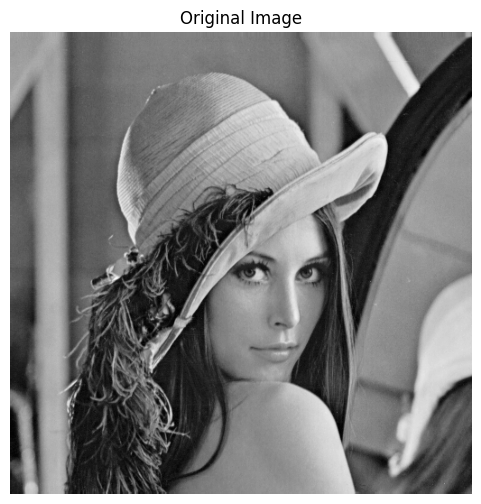

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('image_og.png', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(6, 6))
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Manual 2D Convolution Function
def manual_convolution(image, kernel):
    """Apply a custom kernel to an image manually."""
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the padding
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2

    # Pad the image with zeros on all sides
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output_image = np.zeros_like(image)

    # Perform the convolution
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output_image[i, j] = np.sum(region * kernel)

    # Clip the values to be in the valid range
    output_image = np.clip(output_image, 0, 255)

    return output_image

# Define Kernels
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

blur_kernel = np.ones((3, 3)) / 9

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

corner_detection_kernel = sobel_x + sobel_y

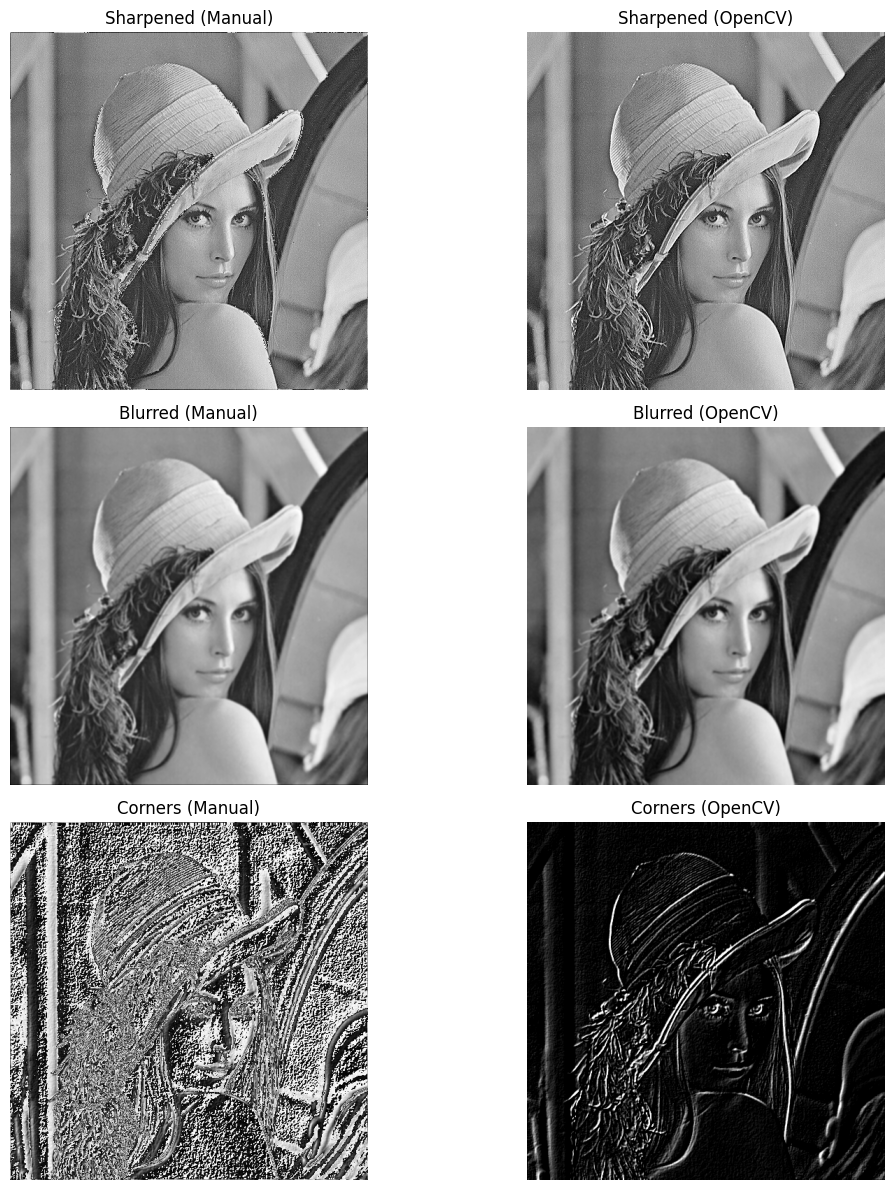

In [ ]:
# Apply kernels manually
sharpened_manual = manual_convolution(image, sharpen_kernel)
blurred_manual = manual_convolution(image, blur_kernel)
corners_manual = manual_convolution(image, corner_detection_kernel)

# Apply kernels with OpenCV
sharpened_cv = cv2.filter2D(image, -1, sharpen_kernel)
blurred_cv = cv2.filter2D(image, -1, blur_kernel)
corners_cv = cv2.filter2D(image, -1, corner_detection_kernel)

# Display results
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
titles = ['Sharpened (Manual)', 'Sharpened (OpenCV)',
          'Blurred (Manual)', 'Blurred (OpenCV)',
          'Corners (Manual)', 'Corners (OpenCV)']

images = [sharpened_manual, sharpened_cv,
          blurred_manual, blurred_cv,
          corners_manual, corners_cv]

for ax, img, title in zip(axs.flat, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()